<a href="https://colab.research.google.com/github/heeeeee0129/2022S-ML/blob/main/HW1_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW1 :: Data preprocessing & KNN

데이터를 불러오는 방법에는 크게 두 가지가 있습니다.
1. 제공된 csv 파일을 코랩 노트북 파일이 있는 드라이브 폴더 경로에 업로드하기
  * 본 노트북 파일과 csv 파일을 같은 드라이브 폴더에 넣기 
  * 아래의 **`코랩과 구글 드라이브 연동하기`** 코드를 사용하여 본인 계정의 구글 드라이브와 코랩 환경을 연동하여 사용
  * 연동하는 코드를 사용하지 않고, **`왼쪽 툴바>다섯 번째 폴더 모양 클릭>파일 글씨 아래에 세 번째 아이콘(드라이브 마운트) 클릭`** 으로도 구글 드라이브와 해당 코랩 세션을 연동할 수 있음
2. 제공된 csv 파일을 직접 코랩 노트북에 업로드하기
  * 코랩 화면에서 **`왼쪽 툴바>다섯 번째 폴더 모양 클릭>파일 글씨 바로 밑에 있는 아이콘(세션 저장소에 업로드) 클릭>로컬에서 파일 업로드`**

어느 방법을 사용하셔도 상관 없습니다. 하지만 리눅스 계열 명령어(pwd, ls, cd) 등을 이용해서 경로를 잘 확인해주세요. 경로를 맞추지 않으면 csv 파일을 불러올 때 에러가 발생합니다. 아래 코드는 코랩과 구글 드라이브를 코드로 연결하는 방법입니다.

## 코랩과 구글 드라이브 연동하기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# pwd 명령어로 현재 위치 확인
!pwd

/content


In [3]:
ls

drive/  heart.csv  sample_data/


In [4]:
cd content

[Errno 2] No such file or directory: 'content'
/content


## 데이터 불러오기 & 살펴보기

In [5]:
# 이번 과제는 numpy, pandas와 같은 데이터를 불러내고 확인, 처리, 
# 수정 등을 쉽게 할 수 있는 library를 사용합니다.

# 모듈 이름 뒤에 as를 쓰고 별칭을 적으면 해당 별칭으로 모듈을 호출할 수 있습니다.
# 모듈명: numpy, 별칭: np => numpy를 쓰는 대신 np를 써서 numpy 호출
# 모듈명: pandas, 별칭: pd => pandas를 쓰는 대신 pd를 써서 pandas 호출
import numpy as np
import pandas as pd

In [6]:
# './'는 이 노트북 파일의 현재 위치를 뜻 합니다.
path = './heart.csv'

# pandas의 read_csv 함수를 사용하여 csv파일을 DataFrame으로 불러옵니다.
data = pd.read_csv(path)

In [7]:
# DataFrame 혹은 Series와 같은 자료구조에 shape함수를 통해 데이터의 크기와 
# 변수의 갯수를 대략적으로 알 수 있습니다.

data.shape # (1190, 12) => 1190 개의 row(행), 12 개의 column(열)을 가진 데이터

(1190, 12)

In [8]:
# head() 함수를 이용하여 해당 데이터의 맨 위 5개의 원소를 볼 수 있습니다.
# 더 많은 행을 보고 싶다면 ()안에 숫자를 넣어주시면 됩니다.

data.head(20)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,51,M,ASY,128,0,0,Normal,107,N,0.0,Up,0
1,48,M,ASY,140,208,0,Normal,159,Y,1.5,Up,1
2,64,F,ASY,142,276,0,Normal,140,Y,1.0,Flat,1
3,40,M,ATA,130,275,0,Normal,150,N,0.0,Up,0
4,63,M,ASY,130,330,1,LVH,132,Y,1.8,Up,1
5,62,M,TA,120,0,1,LVH,134,N,-0.8,Flat,1
6,60,F,NAP,102,318,0,Normal,160,N,0.0,Up,0
7,58,M,ATA,130,230,0,Normal,150,N,0.0,Up,0
8,55,M,ASY,132,353,0,Normal,132,Y,1.2,Flat,1
9,35,M,ASY,120,0,1,Normal,130,Y,1.2,Flat,1


In [9]:
# tail() 함수를 이용하여 해당 데이터의 맨 뒤 5개의 원소를 볼 수 있습니다.
# 더 많은 행을 보고 싶다면 ()안에 숫자를 넣어주시면 됩니다.

data.tail(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1170,61,M,NAP,140,284,0,Normal,123,Y,1.3,Flat,1
1171,67,M,ASY,160,286,0,LVH,108,Y,1.5,Flat,1
1172,39,M,ATA,120,241,0,ST,146,N,2.0,Up,0
1173,66,F,ASY,178,228,1,Normal,165,Y,1.0,Flat,1
1174,62,M,ASY,139,170,0,ST,120,Y,3.0,Flat,1
1175,67,M,ASY,160,384,1,ST,130,Y,0.0,Flat,1
1176,48,F,ATA,133,308,0,ST,156,N,2.0,Up,0
1177,34,M,ATA,150,214,0,ST,168,N,0.0,Up,0
1178,36,M,ATA,120,267,0,Normal,160,N,3.0,Flat,1
1179,55,M,NAP,136,228,0,ST,124,Y,1.6,Flat,1


In [10]:
# DataFrame을 이루고 있는 column의 이름을 확인합니다.

data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [11]:
# DataFrame을 이루고 있는 column 별 데이터의 타입을 확인합니다.

data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [12]:
# describe()는 각 column에 대해 통계량을 요약해주는 함수입니다.
# 기본적으로 NaN(누락데이터)는 제외하고 데이터 요약이 수행됩니다.

data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.425210,132.413445,199.714286,0.236975,137.127731,0.871176,0.560504
std,9.476581,18.270433,109.352682,0.425405,25.259171,1.053458,0.496534
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,175.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,224.500000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,268.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## 문제 1

* 보고서에 설명된 것을 바탕을 주어진 데이터의 변수들의 타입을 보고서에 기술하세요.

  * 기술 형식 : 1. 변수 이름: categorical, nominal 
  * 타입은 대분류, 소분류 형식으로 적으세요. 예) 대분류(categorical), 소분류(nomial)

답)

1. Age: numeric, discrete
2. Sex: categorical, nominal
3. ChestPainType: categorical, nominal
4. RestingBP: numeric, discrete
5. Cholesterol: numeric, discrete
6. FastingBS: categorical, nominal
7. RestingECG: categorical, nominal
8. MaxHR: numeric, discrete
9. ExerciseAngina: categorical, nominal
10. Oldpeak: numeric, continuous
11. ST_Slope: categorical, nominal
12. HeartDisease: categorical. nominal

## 문제 2
* 중복값을 확인하고 중복값을 제거한 후 DataFrame의 차원을 확인하는 코드를 작성하여 캡처 후 보고서에 업로드하세요.

In [13]:
# isnull()는 DataFrame에 있는 결측치(NA)를 boolean 값으로 반환하는 함수입니다.
# 결측치가 있으면 True를 반환합니다.

data.isnull().head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
# isnull()에 sum() 를 결합하여 DataFrame에 있는 결측치의 합을 구합니다.

data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [15]:
# duplicated()는 중복된 데이터를 Series 형식으로 반환합니다.

data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1185    False
1186    False
1187    False
1188    False
1189    False
Length: 1190, dtype: bool

In [16]:
# duplicated()에 sum()을 결합하여 DataFrame에 있는 중복 데이터의 합을 구합니다.

data.duplicated().sum()

272

In [17]:
################  문제 2  ####################
# 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
# 코드 시작과 코드 끝 라인을 삭제하지 마세요.
################ 코드 시작  #####################

data = data.drop_duplicates() #기본으로 설정할 경우 모든 행이 전부 일치하는 행들을 대상으로 삭제

# DataFrame 혹은 Series와 같은 자료구조에 shape함수를 통해 데이터의 크기와 
# 변수의 갯수를 대략적으로 알 수 있습니다.

data.shape # (1190, 12) => 1190 개의 row(행), 12 개의 column(열)을 가진 데이터

# data.shape의 결과까지 캡처하여 보고서에 업로드 하세요.
################ 코드 끝  #####################

(918, 12)

## 문제 3
* outlier 처리하기


### 문제 3-1
* Age, RestingBP, Cholesterol, MaxHR, Oldpeak column에 대해 각각 box plot을 그리고 캡처하여 결과를 보고서에 업로드하세요. (box plot을 그리는 모든 패키지 사용 가능)
  * column의 이름이 box plot의 x축에 나타나도록 하세요.
* outlier가 있는 column의 이름을 모두 보고서에 쓰세요.

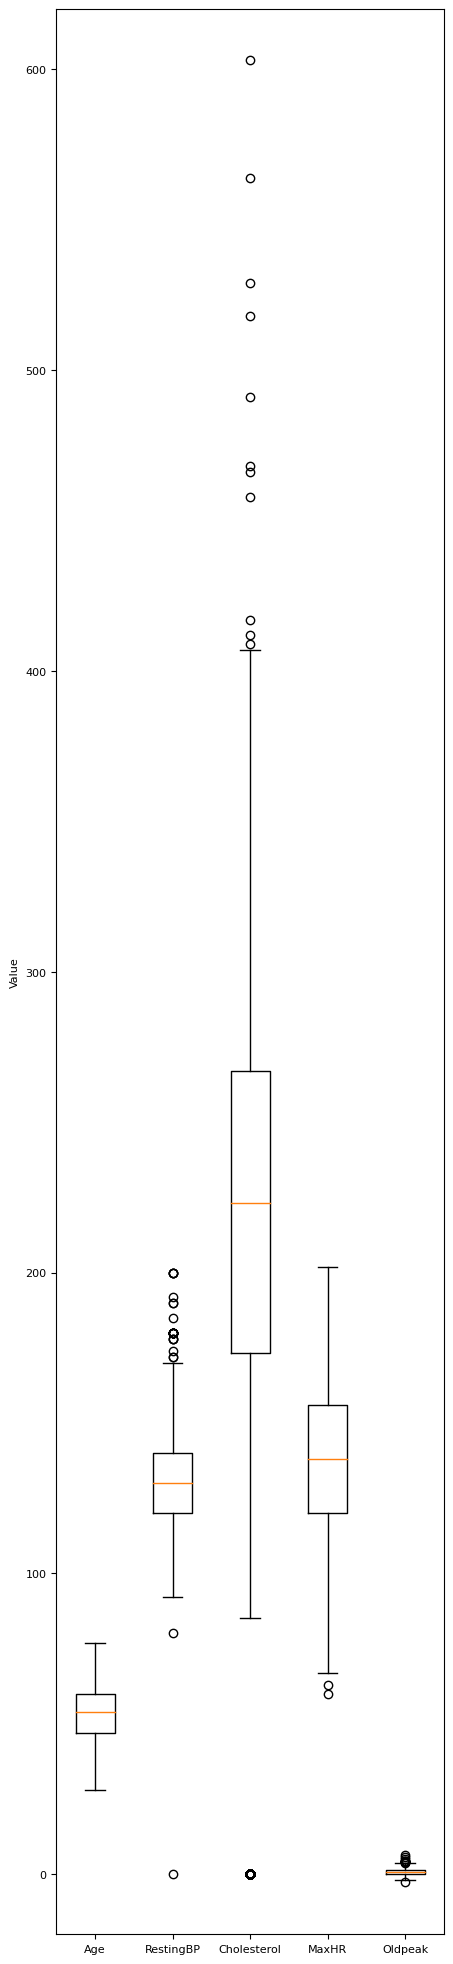

In [18]:
## 코드 작성
import matplotlib.pyplot as plt


plt.style.use('default')
plt.rcParams['figure.figsize'] = (5, 25)
plt.rcParams['font.size'] = 8

fig, ax = plt.subplots()

ax.boxplot([data['Age'], data['RestingBP'], data['Cholesterol'], data['MaxHR'], data['Oldpeak']])
ax.set_ylim(-20, 620)
plt.xticks([1, 2,3,4,5],['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'])
ax.set_ylabel('Value')
plt.show()


### 문제 3-2
* 문제 3-1에서 outlier가 있다고 판단한 열에 대해서 outlier를 제거하는 함수 extract_outliers() 의 빈 칸을 채워 outlier를 찾으세요.
  * 입력: 원본 데이터, outlier가 있다고 판단한 열 하나
  * 출력: outlier들만 있는 DataFrame

In [19]:
from operator import indexOf
def extract_outliers(data,col):

  q1 =  data[col].quantile(0.25)
  q3 = data[col].quantile(0.75)

  ################  문제 3-2  ####################
  # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
  # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
  ################ 코드 시작  #####################

  iqr = q3-q1
  lower_bound = q1 - (iqr * 1.5)
  upper_bound = q3 + (iqr * 1.5)

  search_df = data[(data[col] > upper_bound) | (data[col] < lower_bound)] 
  # (data[col] > upper_bound) | (data[col] < lower_bound)를 통해서 
  # 결측치에 해당하는 인덱스를 알아내고 결측치 데이터를 search_df에 넣음


  ################ 코드 꿑  ######################
  return search_df

In [20]:
extract_outliers(data ,'RestingBP')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
46,57,M,ATA,180,285,1,ST,120,N,0.8,Flat,1
72,45,F,ATA,180,295,0,Normal,180,N,0.0,Up,0
180,52,M,NAP,172,199,1,Normal,162,N,0.5,Up,0
189,60,M,NAP,180,0,0,ST,140,Y,1.5,Flat,0
199,57,F,ASY,180,347,0,ST,126,Y,0.8,Flat,0
208,64,F,ASY,180,325,0,Normal,154,Y,0.0,Up,0
326,53,M,ASY,80,0,0,Normal,141,Y,2.0,Down,0
346,55,M,ASY,172,260,0,Normal,73,N,2.0,Flat,1
347,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1
351,54,M,ASY,180,0,1,Normal,150,N,1.5,Flat,1


In [21]:
extract_outliers(data ,'Cholesterol')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,51,M,ASY,128,0,0,Normal,107,N,0.0,Up,0
5,62,M,TA,120,0,1,LVH,134,N,-0.8,Flat,1
9,35,M,ASY,120,0,1,Normal,130,Y,1.2,Flat,1
13,69,M,ASY,130,0,1,ST,129,N,1.0,Flat,1
27,60,M,NAP,115,0,1,Normal,143,N,2.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1077,41,M,ASY,125,0,1,Normal,176,N,1.6,Up,1
1083,46,M,ASY,100,0,1,ST,133,N,-2.6,Flat,1
1085,42,M,ASY,105,0,1,Normal,128,Y,-1.5,Down,1
1091,72,M,NAP,160,0,0,LVH,114,N,1.6,Flat,0


In [22]:
extract_outliers(data ,'MaxHR')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
139,51,M,ASY,140,0,0,Normal,60,N,0.0,Flat,1
377,60,M,ASY,135,0,0,Normal,63,Y,0.5,Up,1


In [23]:
extract_outliers(data ,'Oldpeak')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
157,65,M,ASY,136,248,0,Normal,140,Y,4.0,Down,1
177,62,F,ASY,160,164,0,LVH,145,N,6.2,Down,1
239,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
248,74,M,ASY,150,258,1,ST,130,Y,4.0,Down,1
276,38,M,TA,120,231,0,Normal,182,Y,3.8,Flat,1
301,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1
310,61,M,ASY,120,282,0,ST,135,Y,4.0,Down,1
458,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1
522,51,M,ASY,140,298,0,Normal,122,Y,4.2,Flat,1
576,52,M,ASY,160,246,0,ST,82,Y,4.0,Flat,1


### 문제 3-3
* 문제 3-1에서 outlier가 있다고 판단한 열에 대해 문제 3-2의 extract_outliers()를 사용하여 원본 데이터프레임(data)에서 outlier를 제거한 DataFrame data_clean을 만드세요. 

In [24]:
out_restingBP = extract_outliers(data, "RestingBP")
out_cholesterol = extract_outliers(data, "Cholesterol")
out_maxHR = extract_outliers(data, "MaxHR")
out_oldpeak = extract_outliers(data, "Oldpeak")

In [25]:
# 코드 작성
index1 = out_restingBP.index
data_clean = data.drop(index1, errors = 'ignore')
# restingBP column에서 이상치에 해당하는 데이터들의 인덱스 ==> index1
# data 데이터프레임에서 이상치를 가지는 인덱스에 해당되는 행을 제거하여 data_clean 데이터 프레임에 저장
# 해당하는 인덱스 값이 존재하지 않는 경우(위에서의 중복값 제거로 인해) key error가 뜨는 것을 방지하기 위해 errors='ignore' 옵션 사용

index2 = out_cholesterol.index
data_clean.drop(index2, errors = 'ignore',inplace=True)
# cholesterol column에서 이상치에 해당하는 데이터들의 인덱스 ==> index2
# data_clean 데이터프레임에서 이상치를 가지는 인덱스에 해당되는 행을 제거하여 data_clean 데이터 프레임에 다시 저장
# 해당하는 인덱스 값이 존재하지 않는 경우 key error가 뜨는 것을 방지하기 위해 errors='ignore' 옵션 사용


index3 = out_maxHR.index
data_clean.drop(index3, errors = 'ignore',inplace=True)
# maxHR column에서 이상치에 해당하는 데이터들의 인덱스 ==> index3
# data_clean 데이터프레임에서 이상치를 가지는 인덱스에 해당되는 행을 제거하여 data_clean 데이터 프레임에 다시 저장
# 해당하는 인덱스 값이 존재하지 않는 경우 key error가 뜨는 것을 방지하기 위해 errors='ignore' 옵션 사용

index4 = out_oldpeak.index
data_clean.drop(index4, errors = 'ignore',inplace=True)
# oldpeak column에서 이상치에 해당하는 데이터들의 인덱스 ==> index3
# data_clean 데이터프레임에서 이상치를 가지는 인덱스에 해당되는 행을 제거하여 data_clean 데이터 프레임에 다시 저장
# 해당하는 인덱스 값이 존재하지 않는 경우 key error가 뜨는 것을 방지하기 위해 errors='ignore' 옵션 사용




In [26]:
## 본 코드의 결과를 캡처 후 보고서에 업로드하세요.

data_clean

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,48,M,ASY,140,208,0,Normal,159,Y,1.5,Up,1
2,64,F,ASY,142,276,0,Normal,140,Y,1.0,Flat,1
3,40,M,ATA,130,275,0,Normal,150,N,0.0,Up,0
4,63,M,ASY,130,330,1,LVH,132,Y,1.8,Up,1
6,60,F,NAP,102,318,0,Normal,160,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1184,55,M,NAP,133,185,0,ST,136,N,0.2,Up,0
1185,41,M,NAP,130,214,0,LVH,168,N,2.0,Flat,0
1187,50,M,ATA,120,168,0,Normal,160,N,0.0,Up,0
1188,49,M,ASY,130,341,0,Normal,120,Y,1.0,Flat,1


## 문제 4


### 문제 4-1
* data_clean의 Sex 열의 데이터 값을 남성(M)일 경우 0, 여성(F)일 경우 1로 인코딩하세요.
* 인코딩 후 data_clean.head()의 결과를 보고서에 캡처하여 업로드하세요.

In [27]:

map_sex = {'M':'0', 'F':'1', '0':'0', '1':'1'} # Sex column에 각 매핑할 숫자를 매칭해서 입력 
# (반복해서 실행하는 경우를 위해 0과 1인 경우도 고려함)
col = ['Sex']  # 위의 매핑을 적용할 칼럼을 정의

data_clean[col] = data_clean[col].applymap(map_sex.get) #Sex 칼럼에 맵핑 함수를 적용

In [28]:
data_clean.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,48,0,ASY,140,208,0,Normal,159,Y,1.5,Up,1
2,64,1,ASY,142,276,0,Normal,140,Y,1.0,Flat,1
3,40,0,ATA,130,275,0,Normal,150,N,0.0,Up,0
4,63,0,ASY,130,330,1,LVH,132,Y,1.8,Up,1
6,60,1,NAP,102,318,0,Normal,160,N,0.0,Up,0


### 문제 4-2
* data_clean의 ExerciseAngina 열의 데이터 값을 N인 경우 0, Y인 경우 1로 인코딩하세요.

In [29]:
map_sex = {'N':'0', 'Y':'1', '0':'0', '1':'1'} # ExerciseAngina column에 각 매핑할 숫자를 매칭해서 입력 
# (반복해서 실행하는 경우를 위해 0과 1인 경우도 고려함)
col = ['ExerciseAngina']  # 위의 매핑을 적용할 칼럼을 정의

data_clean[col] = data_clean[col].applymap(map_sex.get) #ExerciseAngina 칼럼에 맵핑 함수를 적용

In [30]:
data_clean.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,48,0,ASY,140,208,0,Normal,159,1,1.5,Up,1
2,64,1,ASY,142,276,0,Normal,140,1,1.0,Flat,1
3,40,0,ATA,130,275,0,Normal,150,0,0.0,Up,0
4,63,0,ASY,130,330,1,LVH,132,1,1.8,Up,1
6,60,1,NAP,102,318,0,Normal,160,0,0.0,Up,0


### correlation 구하기
각 변수 별 correlation을 구하기 위해 Sex와 ExerciseAngina 열의 타입을 변경하기

In [31]:
data_clean.info()
# Sex와 ExerciseAngina의 데이터 타입이 object
# object -> int64로 타입 변환이 필요

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 1 to 1189
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             702 non-null    int64  
 1   Sex             702 non-null    object 
 2   ChestPainType   702 non-null    object 
 3   RestingBP       702 non-null    int64  
 4   Cholesterol     702 non-null    int64  
 5   FastingBS       702 non-null    int64  
 6   RestingECG      702 non-null    object 
 7   MaxHR           702 non-null    int64  
 8   ExerciseAngina  702 non-null    object 
 9   Oldpeak         702 non-null    float64
 10  ST_Slope        702 non-null    object 
 11  HeartDisease    702 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 71.3+ KB


In [32]:
data_clean['Sex'] = data_clean['Sex'].astype('int64')
data_clean['ExerciseAngina'] = data_clean['ExerciseAngina'].astype('int64')

In [33]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 702 entries, 1 to 1189
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             702 non-null    int64  
 1   Sex             702 non-null    int64  
 2   ChestPainType   702 non-null    object 
 3   RestingBP       702 non-null    int64  
 4   Cholesterol     702 non-null    int64  
 5   FastingBS       702 non-null    int64  
 6   RestingECG      702 non-null    object 
 7   MaxHR           702 non-null    int64  
 8   ExerciseAngina  702 non-null    int64  
 9   Oldpeak         702 non-null    float64
 10  ST_Slope        702 non-null    object 
 11  HeartDisease    702 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 71.3+ KB


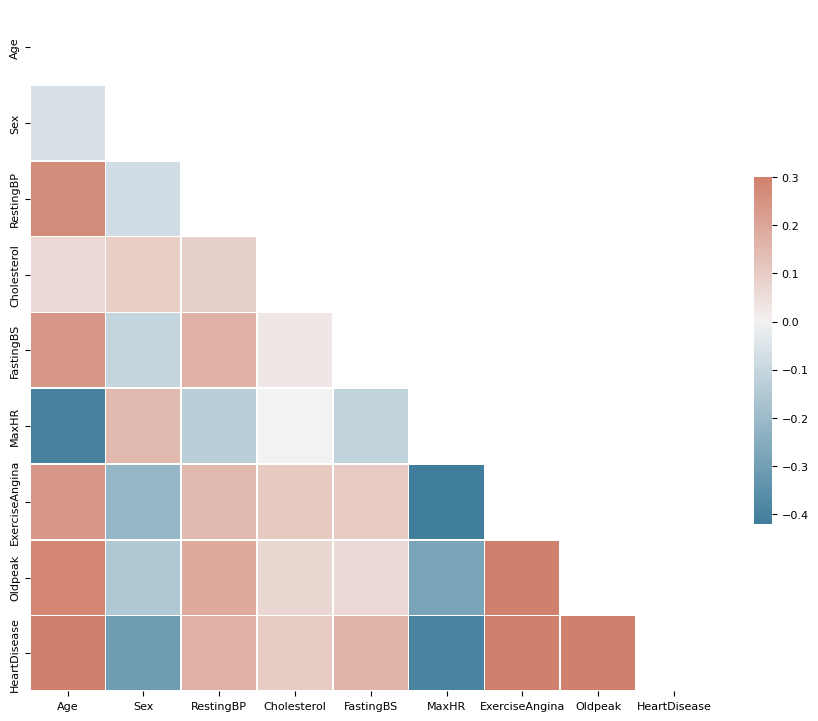

In [34]:
import seaborn as sns
# correlation matrix 계산하기
corr = data_clean.corr()

# 위 삼각형에대한 마스크 생성하기
mask = np.triu(np.ones_like(corr, dtype=bool))

# matplotlib figure 설정하기
f, ax = plt.subplots(figsize=(11, 9))

# colormap 설정하기
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# heatmap 그리기
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


### 문제 4-3
* 위의 Heat map에서 HeartDisease 열과 연관성이 높은 Age, FastingBS,RestingBP, ExerciseAngina, Oldpeak 열만을 추출하여 data_final DataFrame을 만드세요. 
* HeartDisease 열도 data_final에 포함됩니다. 
* data_final.head()의 결과를 보고서에 업로드하세요.

In [73]:
data_final = data_clean[['Age', 'RestingBP', 'FastingBS', 'ExerciseAngina', 'Oldpeak', 'HeartDisease']]
data_final.head()

,Age,RestingBP,FastingBS,ExerciseAngina,Oldpeak,HeartDisease
1,48,140,0,1,1.5,1
2,64,142,0,1,1.0,1
3,40,130,0,0,0.0,0
4,63,130,1,1,1.8,1
6,60,102,0,0,0.0,0


## 문제 5
* KNN 이해하기

### train과 test set 나누기

In [111]:
# train과 test set을 나누기 위한 함수
from sklearn.model_selection import train_test_split

In [121]:
# 아래 결과는 최초 data를 upload했을 때의 사이즈입니다.
data_final.shape

(702, 6)

In [122]:
# 변수들과 label로 활용할 것을 나누는 작업
X = data_final.drop(['HeartDisease'], axis=1)
y = data_final['HeartDisease']

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [124]:
# 아래 결과는 최초 data를 upload했을 때의 사이즈입니다.
print("X_train's shape : ", X_train.shape)
print("X_test's shape : ", X_test.shape)
print("y_train's shape : ", y_train.shape)
print("y_test's shape : ", y_test.shape)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

X_train's shape :  (561, 5)
X_test's shape :  (141, 5)
y_train's shape :  (561,)
y_test's shape :  (141,)


### 문제 5-1, 5-2, 5-3

* 주어진 class Knn을 완성하여 test accuracy가 **0.65 이상**이 나오도록 코드를 완성하세요.


### 문제 5-1
* for문을 **한 번만 사용하여** 두 데이터 사이의 Euclidean Distance를 구하는 dist() 함수를 완성하세요.
* 작성한 코드를 캡처하여 보고서에 업로드하세요.
* 힌트) numpy 에 있는 함수를 사용하세요.


### 문제 5-2
* predict() 함수의 빈 칸을 구현하세요.
* 작성한 코드를 캡처하여 보고서에 업로드하세요.
* 힌트) distance는 dictionary 입니다.

### 문제 5-3
* vote() 함수의 빈 칸을 구현하세요.
* 작성한 코드를 캡처하여 보고서에 업로드하세요.

In [116]:
import tqdm

In [125]:
class Knn():
    
    def __init__(self, n_neighbors): 
        
        ## 생성자로 최근접 이웃수(n_neighbors)를 입력 받습니다.
        self.k = n_neighbors    
    
        ## knn 은 lazy learning 입니다.
    def fit(self,X,y):
        self.X = X
        self.y = y
        
    def predict(self, test) : 
        y_pred = []
        for i in tqdm.tqdm(range(test.shape[0])):

            ## distance는 dictionary
            ## dist() 구현 => 문제 5-1
            distance = self.dist(self.X, test.loc[i])
            # print(distance.items())
            distance = sorted(distance.items(), key= lambda x: x[1])

        ################  문제 5-2  ####################
        # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
        # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
        ################ 코드 시작  #####################
        
            labels = list()
            for i in range(self.k):
              labels.append(distance[i][0])
       
        ################ 코드 끝  #######################
        ###############################################
            

        ## labels: k개의 label을 모은 리스트
        ## selected: vote()를 통해 예측한 label 값
        ## vote() 구현 => 문제 5-3
            selected = self.vote(labels) 

            y_pred.append(selected)
            


        return y_pred ## 모든 비교가 끝나면 예측된 값이 저장된 y_pred 리스트를 반환합니다.
        

    ## dist: 거리를 계산하는 함수 
    def dist(self, X, y) :

        num_train = X.shape[0]
        dist_dict = {} ## {index : distance} 형태

        
        for i in range(num_train):
        
        ################  문제 5-1  ####################
        # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
        # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
        ################ 코드 시작  #####################
          dist_dict[i] = np.sqrt(np.sum((X.iloc[i] - y) ** 2))
        ################ 코드 끝  ######################
        ##############################################
        

        return dist_dict ## dictionary


    ## vote: test 데이터의 label을 선택하는 함수
    def vote(self, labels):
      ## labels: k개의 label을 담고 있는 리스트
      selected = 0
      ################  문제 5-3  ####################
      # 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
      # 코드 시작과 코드 끝 라인을 삭제하지 마세요.
      ################ 코드 시작  #####################

                    # 코드 작성
      one = 0; zero = 0
      for i in labels:
        if self.y[i] == 1:
          one=one+1
        else:
          zero=zero+1
      selected = 1 if one>zero else 0
      ################ 코드 끝  ######################
      ##############################################

      return selected

In [126]:
from sklearn.metrics import accuracy_score

# 아래는 test accuracy를 계산하는 코드입니다.
# 아래 코드를 실행시켜 그 결과를 캡처 후 보고서에 업로드하세요

# 아래 숫자는 변경하셔도 상관 없습니다.
classifier = Knn(3)
classifier.fit(X_train, y_train)

# test set에 대해 predict를 진행합니다.
result = classifier.predict(X_test)

# 실제 label과 예측한 label의 score를 계산합니다.
accuracy_score(y_test, result)

100%|██████████| 141/141 [00:52<00:00,  2.69it/s]


0.6879432624113475

### 문제 5-4
* 완성한 Knn을 사용하여 K 값에 따라 변화하는 train accuracy, test accuracy를 그래프로 그리세요.
* 소스코드와 그래프를 **함께** 캡처하여 보고서에 업로드하세요.

100%|██████████| 520/520 [02:51<00:00,  3.04it/s]


Text(0, 0.5, 'accuracy')

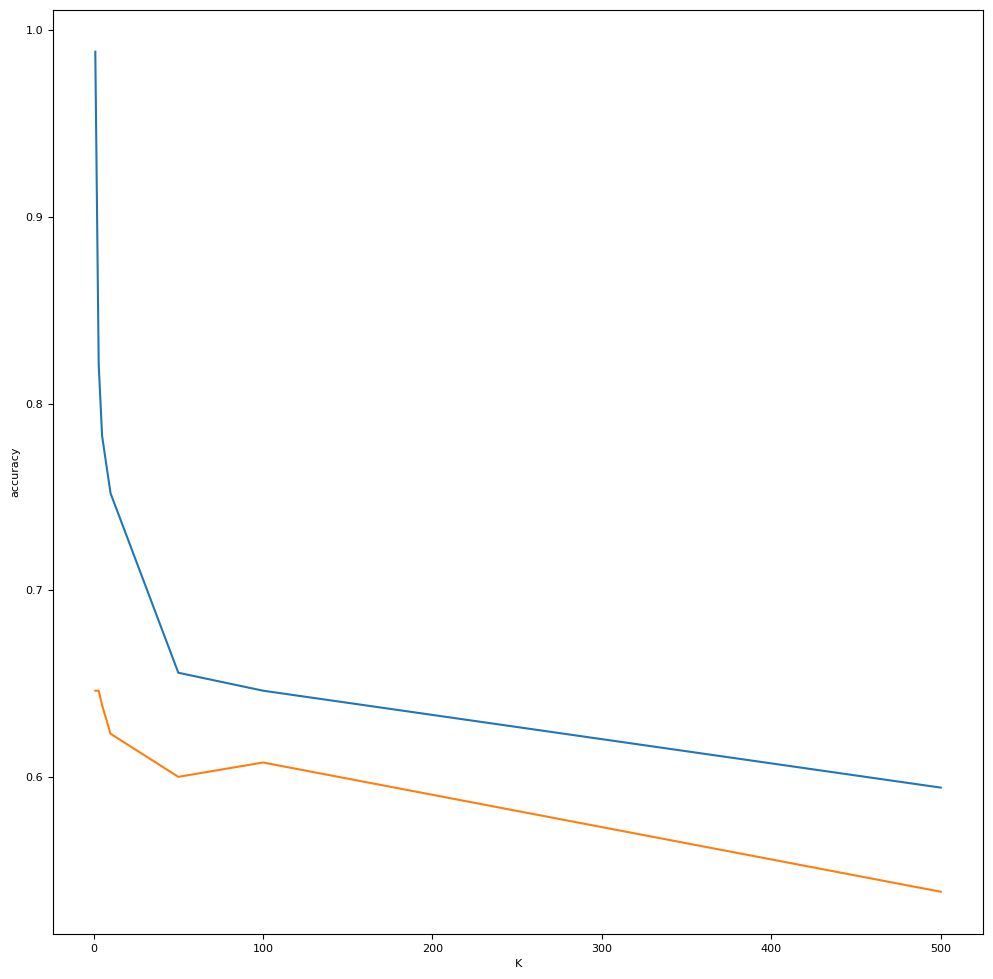

In [93]:
K = [1, 3, 5, 10, 50, 100, 500]
train_acc = []
test_acc = []

################  문제 5-4  ####################
# 소스코드를 입력하고 캡처 후 보고서에 업로드하세요.
# 코드 시작과 코드 끝 라인을 삭제하지 마세요.
################ 코드 시작  #####################

# 소스코드를 입력하고 그래프와 함께 캡처 후 보고서에 업로드 하세요
for i in K:
  classifier = Knn(i)
  classifier.fit(X_train, y_train)
  result = classifier.predict(X_test)
  test_acc.append(accuracy_score(y_test, result))
  result = classifier.predict(X_train)
  train_acc.append(accuracy_score(y_train, result))
plt.rcParams['figure.figsize'] = (12, 12)
################ 코드 끝  ######################
# x축을 K값, y축을 정확도로하여 K에 대한 train, test의 정확도에 대한 그래프 생성
plt.figure()
plt.plot(K, train_acc, label='train accuracy')
plt.plot(K, test_acc, label='test accuracy')
plt.xlabel('K')
plt.ylabel('accuracy')


### 문제 5-5
* Knn classifer의 정확도를 0.75 이상으로 개선하는 방법에 대해 고민해보세요.
* 패키지 사용 가능합니다.
* 힌트) HeartDisease 데이터의 0과 1의 비율에 대해서 생각해보세요. 
* 아래 코드를 실행시켜 그 결과를 캡처 후 보고서에 업로드하세요.

In [133]:
from pandas.core.frame import DataFrame
# 코드 개선

zero_index = data_final['HeartDisease'] == 0
#Heartdisease가 0인 샘플들만 있는 데이터 프레임 생성
one_index = data_final['HeartDisease'] == 1
#Heartdisease가 1인 샘플들만 있는 데이터 프레임 생성

zero_frame = data_final[zero_index].head(325)
#heartdisease가 1인 데이터 프레임과 0인 데이터 프레임에서 동일한 크기만큼 샘플을 가지고 옴
one_frame = data_final[one_index].head(325)

# print(zero_frame)
# print(one_frame)

final_data_frame = pd.concat([one_frame, zero_frame])
#두 개의 데이터 프레임을 하나로 합쳐서 트레이닝 세트를 뽑아냄.

X = final_data_frame.drop(['HeartDisease'], axis=1)
y = final_data_frame['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print("X_train's shape : ", X_train.shape)
print("X_test's shape : ", X_test.shape)
print("y_train's shape : ", y_train.shape)
print("y_test's shape : ", y_test.shape)
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)



X_train's shape :  (585, 5)
X_test's shape :  (65, 5)
y_train's shape :  (585,)
y_test's shape :  (65,)


In [134]:
from sklearn.metrics import accuracy_score

# 아래는 test accuracy를 계산하는 코드입니다.
# 아래 코드를 실행시켜 그 결과를 캡처 후 보고서에 업로드하세요

# 아래 숫자는 변경하셔도 상관 없습니다.
classifier = Knn(3)
classifier.fit(X_train, y_train)

# test set에 대해 predict를 진행합니다.
result = classifier.predict(X_test)

# 실제 label과 예측한 label의 score를 계산합니다.
accuracy_score(y_test, result)

100%|██████████| 65/65 [00:24<00:00,  2.64it/s]


0.7538461538461538